In [1]:
using StatsBase

In [2]:
include("betaSkeletons.jl")

plotDelaunay (generic function with 1 method)

In [3]:
using HDF5, JLD, Test, ProgressMeter, Pkg

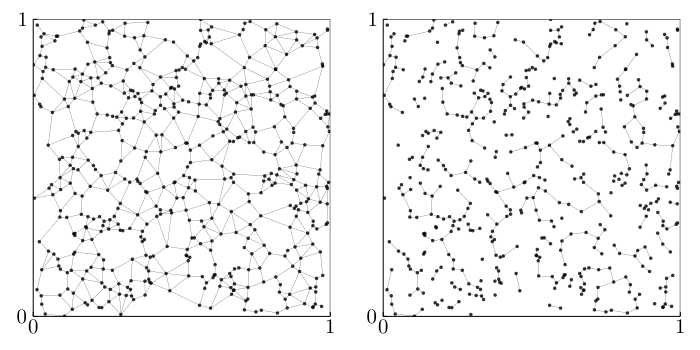

In [4]:
puntos, luna, circulo = betaSkeleton(1.2, 500)
p1 = plotBetaSkeleton(puntos, luna)
p2 = plotBetaSkeleton(puntos, circulo)
plot(p1, p2, layout = (1, 2), legend=false, size = (700, 350))

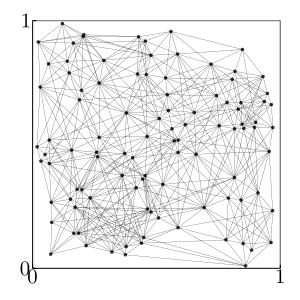

In [5]:
puntos, adeacencia = betaSkeleton(0.58, 100)
plotBetaSkeleton(puntos, adeacencia)

In [6]:
function szprintp(szfile)
    if szfile <= 10^6
        return (szfile/10^3, "KB") 
    elseif 10^6 < szfile <= 10^9
        return (szfile/10^6, "MB")
    elseif 10^9 < szfile <= 10^12
        return (szfile/10^9, "GB")
    elseif 10^12 < szfile <= 10^15
        return(szfile/10^12, "TB")
    else
        return ("=> Petabytes")
    end
end

szprintp (generic function with 1 method)

In [7]:
function sumColsNaN(arreglo)
    ncols = size(arreglo)[2]
    sumcol = zeros(ncols)
    for i in 1:ncols
        columni = arreglo[:,i]
        sumcol[i] = sum(columni[.!isnan.(columni)])
    end
    sumcol
end

sumColsNaN (generic function with 1 method)

In [8]:
function sumColsInf(arreglo)
    ncols = size(arreglo)[2]
    sumcol = zeros(ncols)
    for i in 1:ncols
        columni = arreglo[:,i]
        sumcol[i] = sum(columni[.!isinf.(columni)])
    end
    sumcol
end

sumColsInf (generic function with 1 method)

In [10]:
function spectra_eigenfunctions(dim_base, beta, numOfnodes, iteraciones)
    lowerB = Int64(ceil(numOfnodes/4))
    upperB = Int64(ceil(numOfnodes*3/4))
    size_s = upperB - lowerB
    file = h5open("lDim$(numOfnodes)beta$(beta).h5", "w")
    spacingslunes = d_create(file,"spacingslunes",datatype(Float64), dataspace(size_s, 1, iteraciones))
    iprqss = d_create(file,"iprqss",datatype(Float64), dataspace(size_s, 81, iteraciones))
    #valscircles = d_create(fm,"valsCircles",datatype(Float64), dataspace(size_s, 1, iteraciones))  
    for i in 1:iteraciones
        nodos, lunes, circulos = betaSkeleton(beta, numOfnodes)
        slunes = Symmetric(lunes)
        #scirculos = Symmetric(circulos)
        valsLune, vecsLune = eigen(slunes)
        #valsCirculo, vecsCirculo = eigen(scirculos)
        
        silune = valsLune[lowerB:upperB - 1]
        sflune = valsLune[lowerB + 1:upperB]
        spacingslunes[:, :, i] = sflune .- silune # energy level spacings
        cutvecs = vecsLune[:,lowerB:upperB-1]
        
        for (indx, qi) in enumerate(-4:0.1:4)
            eigenqi = abs.(cutvecs).^(2*qi)
            if qi == 1.0
                iprqss[:,indx,i] = -sumColsNaN(eigenqi.*log.(eigenqi))
            else
                iprqss[:,indx,i] = sumColsInf(eigenqi)
            end
        end
    end
    flush(file)
    close(file)
end

spectra_eigenfunctions (generic function with 1 method)

In [11]:
#spectra_eigenfunctions(1.0, 1.0, 500, 2000)

In [12]:
#50, 100, 200, 400, 800

In [13]:
spectra_eigenfunctions(1.0, 1.0, 50, 20000)

In [14]:
spectra_eigenfunctions(1.0, 1.0, 100, 10000)

In [15]:
spectra_eigenfunctions(1.0, 1.0, 200, 5000)

In [16]:
spectra_eigenfunctions(1.0, 1.0, 400, 2500)

In [17]:
spectra_eigenfunctions(1.0, 1.0, 800, 1250)

In [21]:
spectra_eigenfunctions(1.0, 1.0, 1600, 625)

In [565]:
2000*250

500000

In [511]:
spectra_eigenfunctions(1.0, 1.0, 3200, 313)

In [570]:
spectra_eigenfunctions(1.0, 1.0, 1000, 1000)

In [584]:
spectra_eigenfunctions(1.0, 1.0, 2000, 500)

In [603]:
spectra_eigenfunctions(1.0, 1.0, 4000, 250)

In [ ]:
50, 20000, 100, 10000, 200, 5000, 400, 2500, 800, 1250, 1600, 625

# Load files 

In [22]:
szfilem = filesize("lDim100beta1.0.h5")
szprintp(szfilem)

(328.002048, "MB")

In [451]:
ftest = h5open("lDim500beta1.0.h5","r")
names(ftest)
#close(ftest)

2-element Array{String,1}:
 "iprqss"       
 "spacingslunes"

In [449]:
datatest = h5read("lDim500beta1.0.h5", "iprqss", (:,:,1))

250×81×1 Array{Float64,3}:
[:, :, 1] =
 1.16406e56  4.62583e54  1.83857e53  7.309e51    …  0.00134874   0.00112642 
 2.54605e63  6.61791e61  1.72018e60  4.47125e58     0.000776824  0.000618168
 7.55294e60  2.27072e59  6.82669e57  2.05238e56     0.00708857   0.0061737  
 8.57572e48  5.15569e47  3.10088e46  1.86588e45     0.0045521    0.0038635  
 6.82974e48  4.16377e47  2.53933e46  1.54921e45     0.0065868    0.00575817 
 3.4862e58   1.20124e57  4.13986e55  1.427e54    …  0.0931716    0.0874714  
 5.20045e55  2.1109e54   8.57019e52  3.48033e51     0.00057902   0.000463356
 1.66594e69  3.13961e67  5.91792e65  1.11568e64     0.0101904    0.00901337 
 2.13042e58  7.43941e56  2.59841e55  9.0778e53      0.00375241   0.00324176 
 3.01271e66  6.57965e64  1.43728e63  3.14038e61     0.00332837   0.002805   
 8.69569e56  3.28815e55  1.24362e54  4.70463e52  …  0.000744228  0.000593031
 1.37468e54  6.10502e52  2.71178e51  1.20479e50     0.061455     0.0572099  
 1.93591e56  7.65683e54  3.0292e53   

In [487]:
close(ftest)

In [9]:
function pshist(filename, luneCircle)
    testbin = collect(range(0.0, 5.0, length=128))
    push!(testbin, 5.0 + testbin[2])
    
    fileattr = h5open(filename,"r")
    dimensiones = size(readmmap(fileattr[luneCircle]))    
    sizels = dimensiones[1]
    itera = dimensiones[3]
    close(fileattr)
    
    data = h5read(filename, luneCircle, (:,:,1))
    lsdval = reshape(data./mean(data), (sizels,))
    lsdval[lsdval .> 5.0] .= 5.01
    hist1 = fit(Histogram, lsdval, testbin)
    
    for i in 2:itera
        dataentryi = h5read(filename, luneCircle, (:,:,i))
        lsdval = reshape(dataentryi./mean(dataentryi), (sizels,))
        lsdval[lsdval .> 5.0] .= 5.01
        histi = fit(Histogram, lsdval, testbin)
        merge!(hist1, histi)
    end
    hist1
end

pshist (generic function with 1 method)

In [27]:
hist1 = pshist("lDim50beta1.0.h5", "spacingslunes")

Histogram{Int64,1,Tuple{Array{Float64,1}}}
edges:
  [0.0, 0.0393701, 0.0787402, 0.11811, 0.15748, 0.19685, 0.23622, 0.275591, 0.314961, 0.354331  …  4.68504, 4.72441, 4.76378, 4.80315, 4.84252, 4.88189, 4.92126, 4.96063, 5.0, 5.03937]
weights: [3619, 7238, 9255, 10979, 11990, 12507, 12998, 13468, 13763, 13705  …  21, 37, 30, 27, 24, 19, 21, 17, 23, 246]
closed: left
isdensity: false

In [58]:
hist2 = pshist("lDim100beta1.0.h5", "spacingslunes")
hist3 = pshist("lDim200beta1.0.h5", "spacingslunes")
hist4 = pshist("lDim400beta1.0.h5", "spacingslunes")
hist5 = pshist("lDim800beta1.0.h5", "spacingslunes");

In [59]:
hist6 = pshist("lDim1600beta1.0.h5", "spacingslunes");

In [598]:
hist2000 = pshist("lDim2000beta1.0.h5", "spacingslunes")
hist3200 = pshist("lDim3200beta1.0.h5", "spacingslunes");

In [ ]:
plot(y, xaxis = ("my label", (0,10), 0:0.5:10, :log, :flip, font(20, "Courier")))

plot(y, xlabel = "my label",
        xlims = (0,10),
        xticks = 0:0.5:10,
        xscale = :log,
        xflip = true,
        xtickfont = font(20, "Courier"))

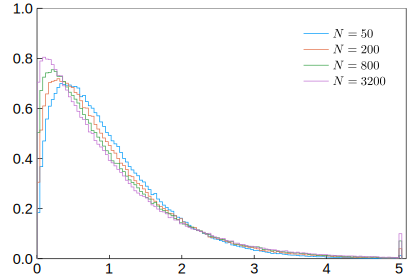

In [602]:
plot(normalize(hist1, mode = :pdf), seriestype=:steps, label = L"N = 50", legend = true,
    legendfontsize = 12, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(0,5.1), ylim=(0,1),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
#plot!(normalize(hist2, mode = :pdf), seriestype=:steps, legend = false)
plot!(normalize(hist3, mode = :pdf), seriestype=:steps, label = L"N=200")
#plot!(normalize(hist4, mode = :pdf), seriestype=:steps, legend = false)
plot!(normalize(hist5, mode = :pdf), seriestype=:steps, label = L"N=800")
#plot!(normalize(hist6, mode = :pdf), seriestype=:steps, label = L"N=1600")
#plot!(normalize(hist2000, mode = :pdf), seriestype=:steps, label = L"N=2000")
plot!(normalize(hist3200, mode = :pdf), seriestype=:steps, label = L"N=3200")
#plot!(normalize(hist1, mode = :probability), seriestype=:steps)

In [61]:
spectra_eigenfunctions(1.0, 10.0, 100, 10000)

In [62]:
hist7 = pshist("lDim100beta10.0.h5", "spacingslunes")

Histogram{Int64,1,Tuple{Array{Float64,1}}}
edges:
  [0.0, 0.0393701, 0.0787402, 0.11811, 0.15748, 0.19685, 0.23622, 0.275591, 0.314961, 0.354331  …  4.68504, 4.72441, 4.76378, 4.80315, 4.84252, 4.88189, 4.92126, 4.96063, 5.0, 5.03937]
weights: [18864, 17939, 17284, 16677, 16125, 15461, 14895, 14450, 13848, 13475  …  156, 157, 132, 152, 139, 133, 111, 118, 117, 2633]
closed: left
isdensity: false

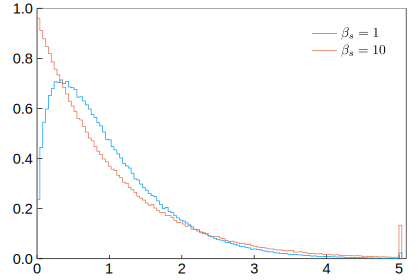

In [67]:
plot(normalize(hist2, mode = :pdf), seriestype=:steps, label = L"\beta_s= 1", legend = true,
    legendfontsize = 13, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(0,5.1), ylim=(0,1),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
plot!(normalize(hist7, mode = :pdf), seriestype=:steps, label = L"\beta_s=10")

In [72]:
function spectra_eigenfunctions2(dim_base, beta, numOfnodes, iteraciones)
    lowerB = Int64(ceil(numOfnodes/4))
    upperB = Int64(ceil(numOfnodes*3/4))
    size_s = upperB - lowerB
    file = h5open("lDim$(numOfnodes)beta$(beta).h5", "w")
    spacingslunes = d_create(file,"spacingslunes",datatype(Float64), dataspace(size_s, 1, iteraciones))
    iprqss = d_create(file,"iprqss",datatype(Float64), dataspace(size_s, 81, iteraciones))
    #valscircles = d_create(fm,"valsCircles",datatype(Float64), dataspace(size_s, 1, iteraciones))  
    for i in 1:iteraciones
        nodos, adeacencia = betaSkeleton(beta, numOfnodes)
        #nodos, lunes, circulos = betaSkeleton(beta, numOfnodes)
        slunes = Symmetric(adeacencia)
        #scirculos = Symmetric(circulos)
        valsLune, vecsLune = eigen(slunes)
        #valsCirculo, vecsCirculo = eigen(scirculos)
        
        silune = valsLune[lowerB:upperB - 1]
        sflune = valsLune[lowerB + 1:upperB]
        spacingslunes[:, :, i] = sflune .- silune # energy level spacings
        cutvecs = vecsLune[:,lowerB:upperB-1]
        
        for (indx, qi) in enumerate(-4:0.1:4)
            eigenqi = abs.(cutvecs).^(2*qi)
            if qi == 1.0
                iprqss[:,indx,i] = -sumColsNaN(eigenqi.*log.(eigenqi))
            else
                iprqss[:,indx,i] = sumColsInf(eigenqi)
            end
        end
    end
    flush(file)
    close(file)
end

spectra_eigenfunctions2 (generic function with 1 method)

In [73]:
spectra_eigenfunctions2(1.0, 0.1, 100, 10000)

In [76]:
hist8 = pshist("lDim100beta0.1.h5", "spacingslunes")

Histogram{Int64,1,Tuple{Array{Float64,1}}}
edges:
  [0.0, 0.0393701, 0.0787402, 0.11811, 0.15748, 0.19685, 0.23622, 0.275591, 0.314961, 0.354331  …  4.68504, 4.72441, 4.76378, 4.80315, 4.84252, 4.88189, 4.92126, 4.96063, 5.0, 5.03937]
weights: [639, 1944, 3136, 4398, 5648, 6769, 7871, 8727, 9900, 10496  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
closed: left
isdensity: false

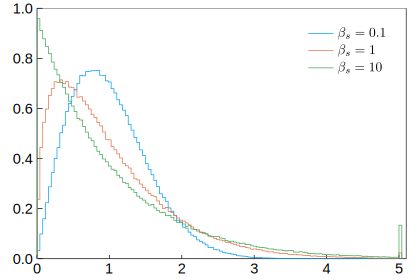

In [80]:
plot(normalize(hist8, mode = :pdf), seriestype=:steps, label = L"\beta_s= 0.1", legend = true,
    legendfontsize = 13, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(0,5.1), ylim=(0,1),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
plot!(normalize(hist2, mode = :pdf), seriestype=:steps, label = L"\beta_s=1")
plot!(normalize(hist7, mode = :pdf), seriestype=:steps, label = L"\beta_s=10")


In [81]:
spectra_eigenfunctions2(1.0, 0.9, 100, 10000)

In [82]:
hist9 = pshist("lDim100beta0.9.h5", "spacingslunes")

Histogram{Int64,1,Tuple{Array{Float64,1}}}
edges:
  [0.0, 0.0393701, 0.0787402, 0.11811, 0.15748, 0.19685, 0.23622, 0.275591, 0.314961, 0.354331  …  4.68504, 4.72441, 4.76378, 4.80315, 4.84252, 4.88189, 4.92126, 4.96063, 5.0, 5.03937]
weights: [1179, 3337, 5383, 6976, 8501, 9659, 10776, 11733, 12584, 13181  …  13, 11, 9, 6, 8, 10, 8, 4, 4, 63]
closed: left
isdensity: false

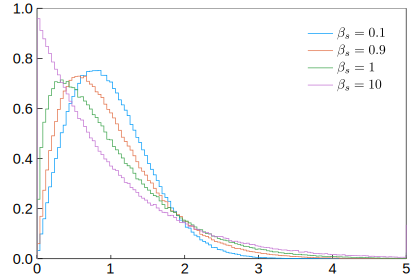

In [95]:
plot(normalize(hist8, mode = :pdf), seriestype=:steps, label = L"\beta_s= 0.1", legend = true,
    legendfontsize = 13, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(0,5.0), ylim=(0,1),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
plot!(normalize(hist9, mode = :pdf), seriestype=:steps, label = L"\beta_s=0.9")
plot!(normalize(hist2, mode = :pdf), seriestype=:steps, label = L"\beta_s=1")
plot!(normalize(hist7, mode = :pdf), seriestype=:steps, label = L"\beta_s=10")

In [10]:
using SpecialFunctions

In [11]:
function ps(s, beta)
    tp = (beta .+ 1).*gamma.((beta .+ 2)./(beta .+1)).^(beta .+ 1).*s.^beta
    texp = exp.(-gamma.((beta .+ 2)./(beta .+ 1)).^(beta .+ 1).*s.^(beta .+ 1))
    tp.*texp
end

ps (generic function with 1 method)

In [141]:
s = LinRange(0,5, 100)

100-element LinRange{Float64}:
 0.0,0.0505051,0.10101,0.151515,0.20202,…,4.79798,4.84848,4.89899,4.94949,5.0

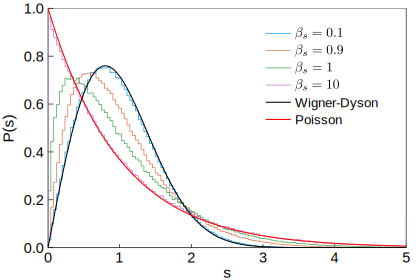

In [204]:
plot(normalize(hist8, mode = :pdf), seriestype=:steps, label = L"\beta_s= 0.1", 
    legend = true,legendfontsize = 13, fg_legend = :white, 
    xlab = "s", ylab = "P(s)", guidefont= font(15, "sans-serif"),
    grid = false, axis = :on, framestyle=:box, xlim =(0,5.0), ylim=(0,1),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
plot!(normalize(hist9, mode = :pdf), seriestype=:steps, label = L"\beta_s=0.9")
plot!(normalize(hist2, mode = :pdf), seriestype=:steps, label = L"\beta_s=1")
plot!(normalize(hist7, mode = :pdf), seriestype=:steps, label = L"\beta_s=10")
plot!(s, ps(s,1.0), lw = 1.5, c =:black, label = "Wigner-Dyson")
plot!(s, ps(s,0.0), lw = 1.5, c =:red,label = "Poisson")


In [251]:
p = plot(s, ps(s,1.0), lw = 1.5, c =:black, label = "Wigner-Dyson",
    legend = true,legendfontsize = 13, fg_legend = :white, 
    xlab = L"s", ylab = L"P(s)", guidefont= font(16, "sans-serif"),
    grid = false, axis = :on, framestyle=:box, xlim =(0,5.0), ylim=(0,1),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
plot!(s, ps(s,0.0), lw = 1.5, c =:red,label = "Poisson")

plot!(normalize(hist8, mode = :pdf), seriestype=:steps, c =:dodgerblue, label = L"\beta_s= 0.1")
plot!(normalize(hist9, mode = :pdf), seriestype=:steps, c =:coral, label = L"\beta_s=0.9")
plot!(normalize(hist2, mode = :pdf), seriestype=:steps, c =:green, label = L"\beta_s=1")
plot!(normalize(hist7, mode = :pdf), seriestype=:steps, c =:mediumorchid, label = L"\beta_s=10")
savefig("psSkeletons.pdf")

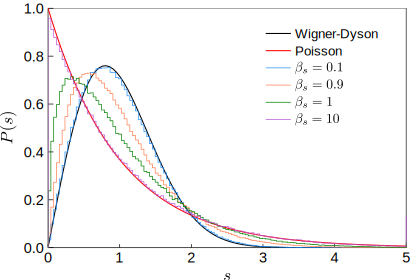

In [252]:
p

In [12]:
using LsqFit

In [348]:
datafit = normalize(hist8, mode = :pdf);

In [349]:
datafit.edges

([0.0, 0.0393701, 0.0787402, 0.11811, 0.15748, 0.19685, 0.23622, 0.275591, 0.314961, 0.354331  …  4.68504, 4.72441, 4.76378, 4.80315, 4.84252, 4.88189, 4.92126, 4.96063, 5.0, 5.03937],)

In [350]:
testbin = collect(range(0.0, 5.0, length=128));

In [356]:
xs = (testbin[2:end] .+ testbin[1:end-1])./2;

In [357]:
ys = datafit.weights[1:end-1];

In [13]:
function findbeta(fn, xdata, ydata)
    fitres = curve_fit(fn, xdata, ydata, [0.5], lower=[0.0], upper=[1.0])
    fitres.param[1], standard_error(fitres)[1]
end

findbeta (generic function with 1 method)

In [399]:
valbeta, sigmaerror = findbeta(ps, xs, ys)

(0.9538427831164866, 0.0021168587861755046)

## Inverse participation ratio

In [481]:
for (indx, qi) in enumerate(-4:0.1:4)
    if qi == 2.0
        println("The index for $qi is  $indx")
    end
end

The index for 2.0 is  61


In [ ]:
50, 20000, 100, 10000, 200, 5000, 400, 2500, 800, 1250, 1600, 625

In [482]:
suma = sum(h5read("lDim50beta1.0.h5", "iprqss", (:,61,:)))

133630.017056112

In [14]:
function getdimsfilekey(filename, keyname)
    fileattr = h5open(filename,"r")
    dimensiones = size(readmmap(fileattr[keyname]))    
    close(fileattr)
    dimensiones
end

getdimsfilekey (generic function with 1 method)

In [433]:
dimsamples = getdimsfilekey("lDim50beta1.0.h5", "iprqss")

(25, 81, 20000)

In [434]:
totalsamples = dimsamples[1]*dimsamples[3]

500000

In [483]:
aviprqi = sum(h5read("lDim50beta1.0.h5", "iprqss", (:,61,:)))/totalsamples

0.267260034112224

In [604]:
numpoints = [50,100,200,400, 500, 800, 1000, 2000, 1600, 3200, 4000]

11-element Array{Int64,1}:
   50
  100
  200
  400
  500
  800
 1000
 2000
 1600
 3200
 4000

In [605]:
valuesIPR = []
for sdim in numpoints
    dimsamples = getdimsfilekey("lDim$(sdim)beta1.0.h5", "iprqss")
    totalsamples = dimsamples[1]*dimsamples[3]
     push!(valuesIPR, sum(h5read("lDim$(sdim)beta1.0.h5", "iprqss", (:,61,:)))/totalsamples)
end

In [606]:
valuesIPR

11-element Array{Any,1}:
 0.267260034112224  
 0.2251267427741842 
 0.1944744760275132 
 0.17138184108064392
 0.16587754317254963
 0.15554315669094643
 0.1511059045654906 
 0.14026528857050372
 0.1433274020983061 
 0.1352600806583169 
 0.1329163413811096 

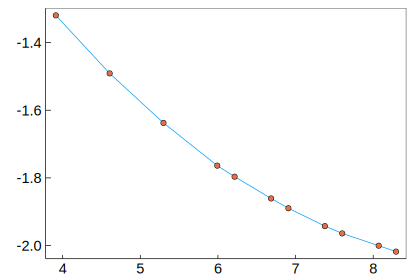

In [607]:
plot(log.(numpoints), log.(valuesIPR), seriestype = [:line, :scatter],
    legend = false, grid = false, axis = :on, framestyle=:box,
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))

In [608]:
linearmodel(x, m) = m[2]*x .+ m[1]

linearmodel (generic function with 1 method)

In [643]:
fitlinear = curve_fit(linearmodel, log.(numpoints[5:end]),log.(valuesIPR[5:end]), [0.5,0.1])

LsqFit.LsqFitResult{Float64,1}(5, [-1.15563, -0.10524], [-0.0131564, 0.00170685, 0.00716543, 0.00866377, 0.0105515, -0.00446348, -0.0104677], [1.0 6.21461; 1.0 6.68461; … ; 1.0 8.07091; 1.0 8.29405], true, Float64[])

In [649]:
fitlinearAll = curve_fit(linearmodel, log.(numpoints[1:end]),log.(valuesIPR[1:end]), [0.5,0.1])

LsqFit.LsqFitResult{Float64,1}(9, [-0.78606, -0.155555], [-0.0750626, -0.0113268, 0.027213, 0.0457971, 0.0437301, 0.0349451, 0.0291762, -0.00420116, 0.00891403, -0.0409767, -0.0582083], [1.0 3.91202; 1.0 4.60517; … ; 1.0 8.07091; 1.0 8.29405], true, Float64[])

In [644]:
fitlinear.param

2-element Array{Float64,1}:
 -1.155634295298657  
 -0.10524035407831539

In [645]:
standard_error(fitlinear)

2-element Array{Float64,1}:
 0.04155928850864705 
 0.005661809973447106

In [646]:
xx = LinRange(3.5, 8.3, 50)

50-element LinRange{Float64}:
 3.5,3.59796,3.69592,3.79388,3.89184,…,7.90816,8.00612,8.10408,8.20204,8.3

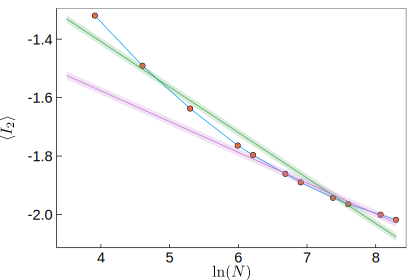

In [652]:
plot(log.(numpoints), log.(valuesIPR), seriestype = [:line, :scatter],
    legend = false, grid = false, axis = :on, framestyle=:box,
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    xlab = L"\ln(N)", ylab = L"\langle I_2\rangle", guidefont= font(15, "sans-serif"),
    dpi=70, size = (600,400))
plot!(xx, linearmodel(xx, fitlinearAll.param), ribbon=(0.013,0.013), fillalpha=0.2)
plot!(xx, linearmodel(xx, fitlinear.param), ribbon=(0.013,0.013), fillalpha=0.2)